In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from nanonets import Simulation
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

plt.style.use(["science","bright","grid"])

# PARAMETERS
V_INPUT_MAX = 0.5
V_GATE_MAX  = 0.5
N_INPUTS    = 960
N_GATES     = 960
V_INPUT     = np.round(np.linspace(-V_INPUT_MAX, V_INPUT_MAX, N_INPUTS),4)
V_I_PLOT    = 1000*V_INPUT
V_GATES     = np.round(np.linspace(-V_GATE_MAX, V_GATE_MAX, N_INPUTS),4)
V_G_PLOT    = 1000*V_GATES
PATH        = "/home/jonasmensing/bagheera/data/1_funding_period/iv_curves/set/"

# Cap Matrix
topo    = {"Nx": 1,"Ny": 1, "electrode_type": ['constant','constant']}
sim_c   = Simulation(topo)
ele_c   = sim_c.ELE_CHARGE_A_C
cap_m   = sim_c.get_capacitance_matrix()
cap_t   = cap_m[0][0]
cap_g   = sim_c.self_capacitance_sphere(3.9,10.0)
cap_m   = sim_c.mutual_capacitance_adjacent_spheres(2.6,10.0,10.0,1.0)
def s_i_th(Ug, n):
    return ((n+0.5)*ele_c + cap_g*Ug)/(cap_t-cap_m)
def i_d_th(Ug, n):
    return ((0.5-n)*ele_c - cap_g*Ug)/(cap_m)

In [2]:
data    = {Vg : pd.read_csv(f"{PATH}set_{Vg:.5f}.csv") for Vg in V_GATES}
pots    = {Vg : pd.read_csv(f"{PATH}mean_state_set_{Vg:.5f}.csv").iloc[:,2].values for Vg in V_GATES}

In [ ]:
q   = np.array([pots[Vg]*cap_t for Vg in V_GATES]) / sim_c.ELE_CHARGE_A_C
y   = np.array([data[Vg]['Observable'].values for Vg in V_GATES])
y_e = np.array([data[Vg]['Error'].values for Vg in V_GATES])

### Zero Gate

In [14]:
data0   = pd.read_csv("data/set_0.000.csv")
q0      = pd.read_csv("data/mean_state_set_0.000.csv").iloc[:,2] * cap_t / sim_c.ELE_CHARGE_A_C
y0      = data0['Observable'].values * 1e-9
ye0     = data0['Error'].values * 1e-9

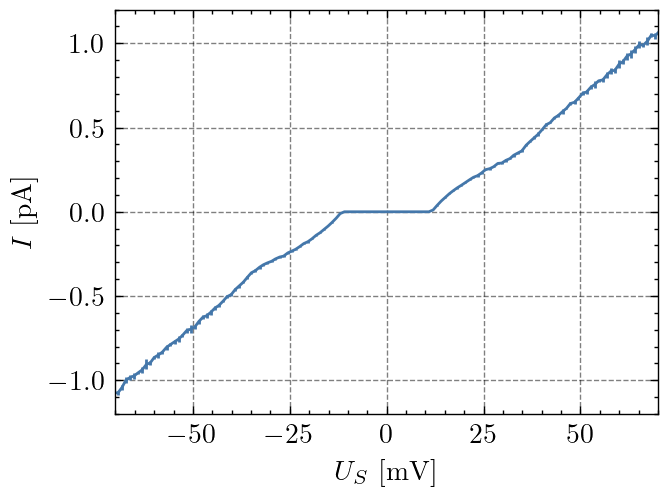

In [15]:
fig, ax = plt.subplots(dpi=200)
ax.errorbar(V_I_PLOT, y0, ye0)
ax.set_xlabel("$U_S$ [mV]")
ax.set_ylabel("$I$ [pA]")
ax.set_xlim(-70,70)
ax.set_ylim(-1.2,1.2)
fig.savefig("plots/svg/SET_I_V_G0.svg", transparent=True)
fig.savefig("plots/pdf/SET_I_V_G0.pdf", transparent=False)
fig.savefig("plots/png/SET_I_V_G0.png", transparent=False)

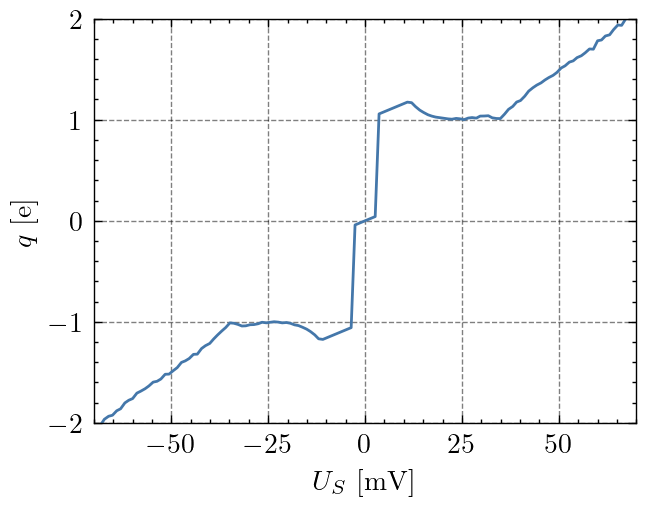

In [16]:
fig, ax = plt.subplots(dpi=200)
ax.plot(V_I_PLOT, q0)
ax.set_xlabel("$U_S$ [mV]")
ax.set_ylabel("$q$ [e]")
ax.set_xlim(-70,70)
ax.set_ylim(-2.0,2.0)
fig.savefig("plots/svg/SET_q_V_G0.svg", transparent=True)
fig.savefig("plots/pdf/SET_q_V_G0.pdf", transparent=False)
fig.savefig("plots/png/SET_q_V_G0.png", transparent=False)

### Diamonds

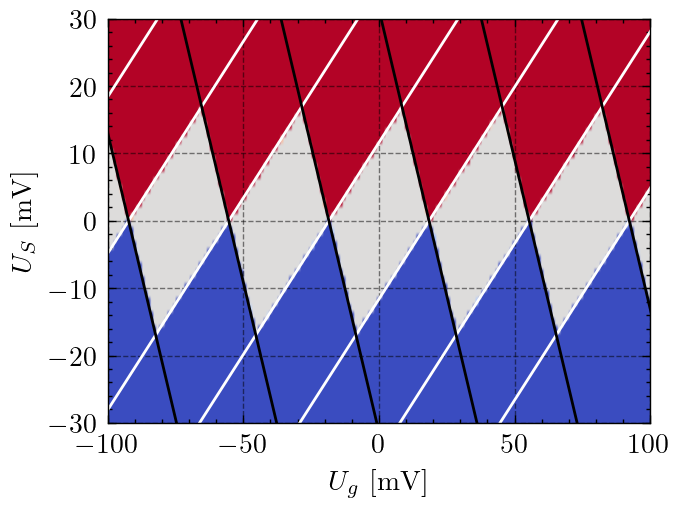

In [90]:
fig, ax = plt.subplots(dpi=200)
ax.imshow(y.T, cmap='coolwarm', origin='lower', extent=(-1000*V_GATE_MAX,1000*V_GATE_MAX,-1000*V_INPUT_MAX,1000*V_INPUT_MAX), vmin=-1, vmax=1, aspect='auto')
for n in [-3,-2,-1,0,1,2,3]:
    ax.plot(V_GATES*1000,1000*s_i_th(V_GATES,n), color='white')
    ax.plot(V_GATES*1000,1000*i_d_th(V_GATES,n), color='black')
ax.set_xlim(-100,100)
ax.set_ylim(-30,30)
ax.set_xlabel("$U_g$ [mV]")
ax.set_ylabel("$U_S$ [mV]")
fig.savefig("plots/svg/SET_C_diamond.svg", transparent=True)
fig.savefig("plots/pdf/SET_C_diamond.pdf", transparent=False)
fig.savefig("plots/png/SET_C_diamond.png", transparent=False)

Text(0, 0.5, '$U_S$ [mV]')

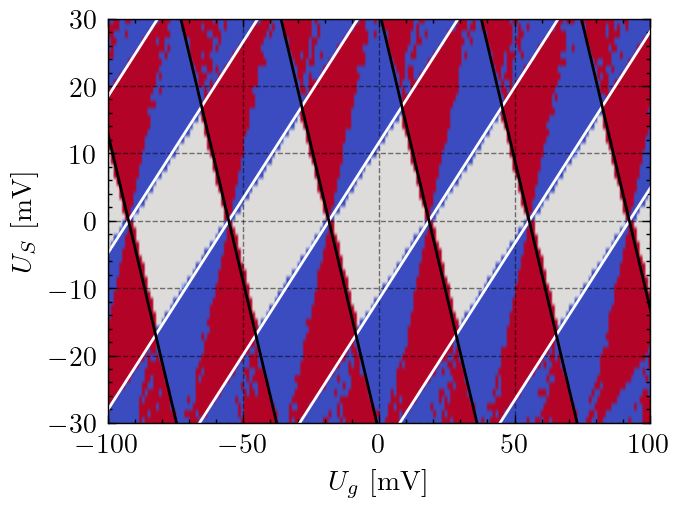

In [83]:
G       = np.gradient(y, V_I_PLOT, axis=0)
fig, ax = plt.subplots(dpi=200)
ax.imshow(G.T, cmap='coolwarm', origin='lower', extent=(-1000*V_GATE_MAX,1000*V_GATE_MAX,-1000*V_INPUT_MAX,1000*V_INPUT_MAX), vmin=-1, vmax=1, aspect='auto')
for n in [-3,-2,-1,0,1,2,3]:
    ax.plot(V_GATES*1000,1000*s_i_th(V_GATES,n), color='white')
    ax.plot(V_GATES*1000,1000*i_d_th(V_GATES,n), color='black')
ax.set_xlim(-100,100)
ax.set_ylim(-30,30)
ax.set_xlabel("$U_g$ [mV]")
ax.set_ylabel("$U_S$ [mV]")

Text(0, 0.5, '$U_S$ [mV]')

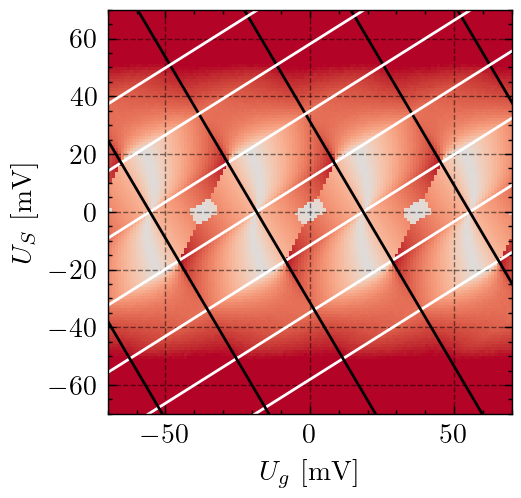

In [75]:
fig, ax = plt.subplots(dpi=200)
ax.imshow(np.abs(q.T), cmap='coolwarm', origin='lower', extent=(-1000*V_GATE_MAX,1000*V_GATE_MAX,-1000*V_INPUT_MAX,1000*V_INPUT_MAX), vmin=-1.5, vmax=1.5)
for n in [-3,-2,-1,0,1,2,3]:
    ax.plot(V_GATES*1000,1000*s_i_th(V_GATES,n), color='white')
    ax.plot(V_GATES*1000,1000*i_d_th(V_GATES,n), color='black')
ax.set_xlim(-70,70)
ax.set_ylim(-70,70)
ax.set_xlabel("$U_g$ [mV]")
ax.set_ylabel("$U_S$ [mV]")